# Tomography/Laminography Reconstruction

This notebook demonstrates a simulated tomography/laminography reconstruction using tike. Since laminography is just a specific case of tomography, one example should be sufficient.

In [1]:
%env TIKE_BACKEND=cupy

env: TIKE_BACKEND=cupy


In [2]:
import logging
import lzma
import pickle

import matplotlib.pyplot as plt
import numpy as np

import tike.lamino
import tike.view

In [3]:
for module in [tike, np]:
    print("{} is version {}".format(module.__name__, module.__version__))

tike is version 0.9.1.dev10+gfe237d2
numpy is version 1.18.4


## Create test data

### Define the object

In [4]:
with lzma.open('../../../tests/data/nalm256.pickle.lzma', 'rb') as file:
    original = pickle.load(file)[::2, ::2, ::2].astype('complex64')
original.shape

(128, 128, 128)

In [5]:
# Mark object to make it asymmetric
original[20:25, 60:64, 20:25] = 0.001

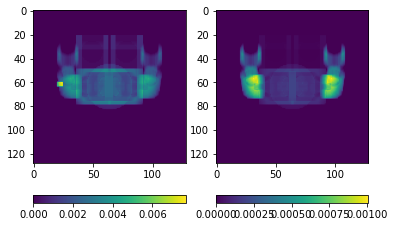

In [6]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=0))
plt.show()

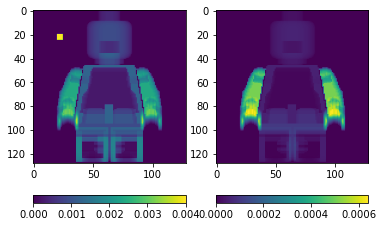

In [7]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=1))
plt.show()

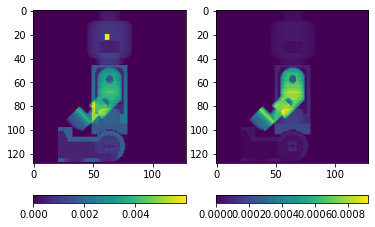

In [8]:
plt.figure()
tike.view.plot_complex(np.sum(original, axis=2))
plt.show()

### Define trajectory

In [9]:
theta = np.linspace(0, np.pi, 128, endpoint=False, dtype='float32')
theta.shape

(128,)

## Simulate data acquisition

In [10]:
tilt=np.pi/2
data = tike.lamino.simulate(obj=original, theta=theta, tilt=tilt)

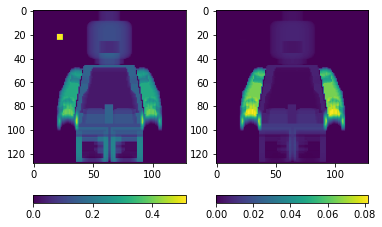

In [11]:
plt.figure()
tike.view.plot_complex(data[0])
plt.show()

## Reconstruct the data

In [12]:
logging.basicConfig(level=logging.INFO)
result = {
    'obj': np.zeros(original.shape, dtype='complex64')
}

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +2.49396e+03
INFO:tike.lamino.solvers.cgrad:    object cost is +6.42014e+02
INFO:tike.lamino.solvers.cgrad:    object cost is +3.05091e+02
INFO:tike.lamino.solvers.cgrad:    object cost is +1.96578e+02


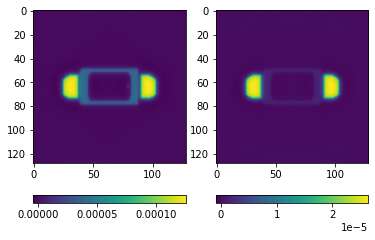

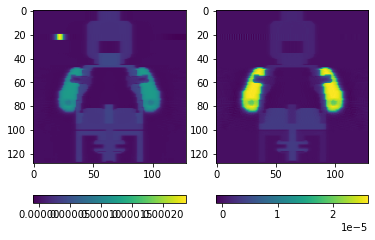

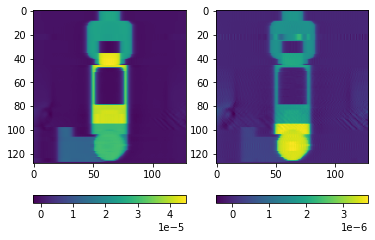

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +1.33942e+02
INFO:tike.lamino.solvers.cgrad:    object cost is +9.48874e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +6.92692e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +5.18137e+01


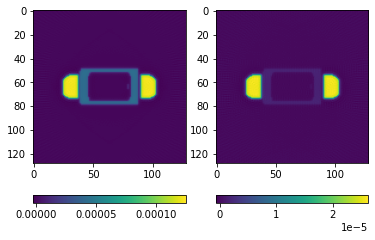

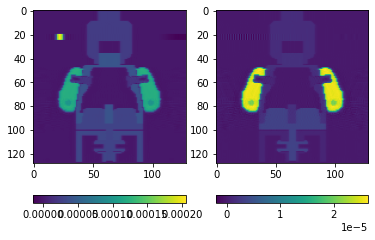

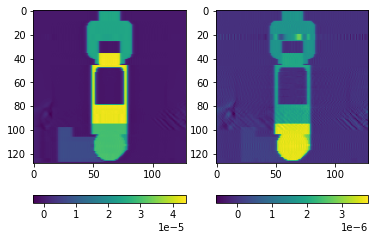

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +3.95455e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +3.06219e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +2.40627e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +1.83194e+01


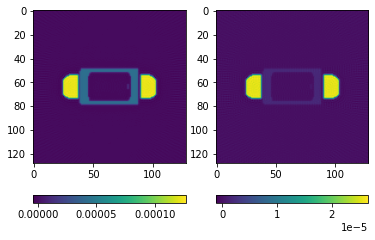

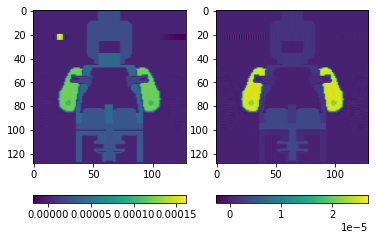

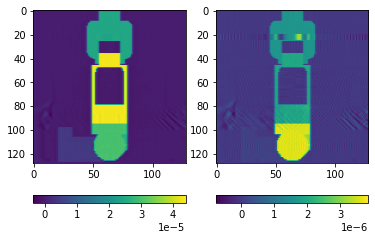

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +1.43512e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +1.16427e+01
INFO:tike.lamino.solvers.cgrad:    object cost is +9.53595e+00
INFO:tike.lamino.solvers.cgrad:    object cost is +6.83945e+00


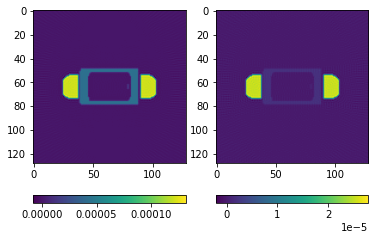

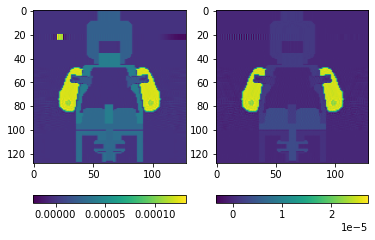

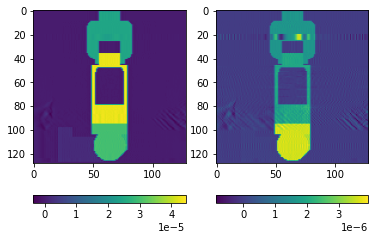

INFO:tike.lamino.lamino:cgrad on 128 by 128 by 128 volume for 4 iterations.
INFO:tike.lamino.solvers.cgrad:    object cost is +5.05198e+00
INFO:tike.lamino.solvers.cgrad:    object cost is +3.84270e+00
INFO:tike.lamino.solvers.cgrad:    object cost is +2.98335e+00
INFO:tike.lamino.solvers.cgrad:    object cost is +2.28901e+00


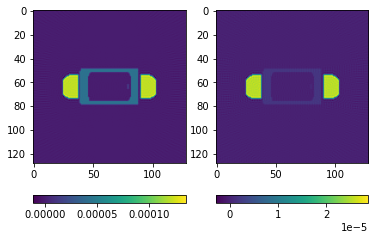

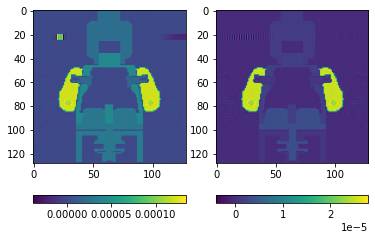

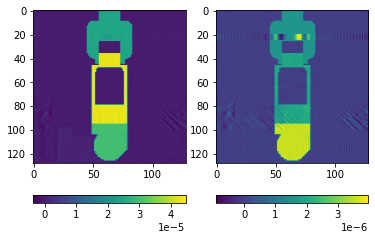

In [13]:
for i in range(5):
    result = tike.lamino.reconstruct(
        **result,
        theta=theta,
        data=data,
        algorithm='cgrad',
        num_iter=4,
        tilt=tilt,
    )
    plt.figure()
    tike.view.plot_complex(result['obj'][64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, 64])
    plt.show()
    plt.figure()
    tike.view.plot_complex(result['obj'][:, :, 64])
    plt.show()